In [3]:
!pip3 install scikit-learn matplotlib seaborn

In [4]:
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [5]:
digits = datasets.load_digits()

# 1.  Explore y describa que información contiene cada uno de los items del conjunto de datos y el tipo de dato que almacenan?

Es un dataset orientado a la clasificación de imágenes, similar a la poular MNIST de dígitos escritos a mano

De acuerdo a su descripción en la documentación de Scikit-learn: 

Classes - 10

Samples per class  - 180

Samples total - 1797

Dimensionality - 64

Features - integers 0 a 16

### Cuenta con 7 atributos: 

#### 1. data: (1797, 64)
Es una matriz de 1797 elementos, cada uno es un vector de tamaño 64

#### 2. target: (1797,)
Es un vector que contiene las etiquetas asociadas a cada vector o matriz 8x8

#### 3. frame: (,)
No presenta información, ni etiquetas, ni dimensión

#### 4. feature_names: (64,)
Es una arreglo de etiquetas asociadas a cada elemento de la matriz 8x8. Cada elemento corresponde a la asociación pixel_i_j, donde i = 0 ... 7, j = 0 ... 7. Haciendo un recorrido por filas. 

#### 5. target_names: (8,)
Es una arreglo de etiquetas asociadas a las clases únicas [0, 1 ... 9]

#### 6. images: (1797, 8, 8)
Es una matriz de tercer orden, donde cada elemento está asociada a una matriz 2D de 8x8

# 2.  Cuantas imagens contiene el conjunto de datos?

1797

In [6]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits['data'].shape

(1797, 64)

# 3.  Cual es la dimensión de cada una de las imagenes que contiene el conjuntos de datos?

2D, matriz 2D de 8x8

In [8]:
digits['images'].shape

(1797, 8, 8)

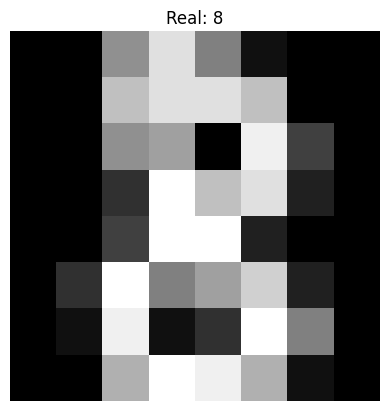

In [9]:
num_img  = 8
l=8
pixels = digits['images'][num_img].reshape((l, l))
label = digits['target'][num_img]

plt.title('Real: {label}'.format(label=label))
plt.axis('off')
plt.imshow(pixels, cmap='gray')
plt.show()

# 4.  Explore y describa para qué se usa el método reshape en el siguiente bloque de código?

la primera línea calcula el número de imagenes en digits que es 1797, luego reshape se usa para modificar la dimensión del objeto. Al usar -1, se infiere la dimensión de la matrix asociada 2D 8x8, pero lo que hace es tomarlo como un TODO (8x8) = 64, se hace un reshape a (1797, 64)

In [10]:
digits.images.shape

(1797, 8, 8)

In [11]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [12]:
data.shape

(1797, 64)

# 5. Cual es la dimensión del vector de caracteristicas y de la variable objetivo?

X = (1797, 64) es decir una matriz 2D

y = (1797,) es un vector con las etiquetas asociadas a las imágenes

In [13]:
# sea X el vector de caracteristicas
X = data
print(X.shape)

# sea "y" la variable objetivo
y = digits.target
print(y.shape)

(1797, 64)
(1797,)


# 6. Explore y explique es para que usa la función train_test_split, pruebe con parametros para test_size iguales a: 0.5, 0.3 y 0.2 y explique la función del paramétro en la siguiente línea de código.

La función train_test_split sirve para dividir el dataset en porciones que servirán en diferentes momentos del pipeline. En este caso se separan en datos de TRAIN y TEST, que cuentan X e Y, es decir, tenemos una variable objetivo. Entonces ambas porciones tendrán X_{} e y_{} variables predictorias y variable objetivo respectivamente. 

El parámetro test_size indica la propoción del conjunto de TEST(El que será usado para evaluar el modelo), en este caso 0.53, el 53% del dataset será usado como TEST. 

In [25]:
def split_data(X, y, test_siz : float = 0.7, shuff : bool = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_siz, shuffle=shuff)
    print(f'TRAIN shape: {X_train.shape}, TEST shape: {X_test.shape}')

In [28]:
split_data(X, y, 0.53, True)
split_data(X, y, 0.3, False)
split_data(X, y, 0.2, True)

TRAIN shape: (844, 64), TEST shape: (953, 64)
TRAIN shape: (1257, 64), TEST shape: (540, 64)
TRAIN shape: (1437, 64), TEST shape: (360, 64)


# 7. Fije el valor del parámetro test_size en un valor de 0.3 y muestre el tamanio del conjunto de entrenamiento y del conjuntos de test.

Tamaño de TRAIN: 1257 instancias 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [30]:
X_train.shape

(1257, 64)

Vamos a entrenar un classificador SVM el cual entrenaremos con X_train y y_train

In [32]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

Vamos a generar el resultado del clasificador para nuestro conjunto de test X_test.

In [33]:
predicted = clf.predict(X_test)

# 8.  Explique la diferencia entre los métodos fit y predict, porque el primero recibe dos parametros (X_train, y_train) y el segundo solamente un parámetro (X_test)?

El método fit() es una interfaz implementada en los algoritmos de ML de ScikitLearn. Esto se usa para entrenar el modelo con los datos de entrenamiento. En el contexto de SVC se calcularían los puntos de frontera entre clases y la búsqueda de planos de separación. Al ser un algoritmo SUPERVISADO, el algoritmo necesita de las variables predictorias y la variable TARGET, es decir, (X_train, y_train).   

Por otro lado, predict() se usa para predecir las etiquetas, dado un conjunto de variables predictorias (X_test), que arrojada un resultado (Conjunto de etiquetas) que serán evaluadas y comparadas con y_test. 

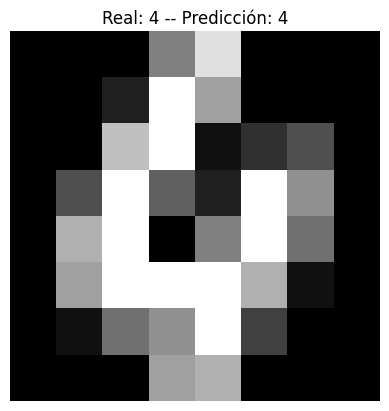

In [34]:
num_img = 0

pixels = X_test[num_img].reshape((8, 8))
label = y_test[num_img]
pred = predicted[num_img]

plt.title('Real: {label} -- Predicción: {pred}'.format(label=label,pred=pred))
plt.axis('off')
plt.imshow(pixels, cmap='gray')
plt.show()

# 9.  Explique los resultados de matriz de confusión generada, cuales son los dígitos que causan más confusión?

Esta matriz de confusión mapea y cuantifica las etiquetas predichas y las originales. La diagonal principal corresponde a la relación (Etiqueta_i_predicha, Etiqueta_i_original), es decir, cuenta los aciertos del modelo. Las demás etiquetas, por ejemplo Etiqueta_0(Primera fila) y Etiqueta_4(Quinta fila) representan la variable original y predicha respectivamente, es decir,  el modelo predijo la Etiqueta 4, en una imagen que correspondía a la Etiqueta_0.

En algunos casos, algunos números pueden confundirse incluso para los humanos. Un caso es el 4 y 9, que difieren muy poco. Así que sería entendible algunas confusiones. 

De todas formas, esta tolerancia va acorde al modelo y los datos con los que se trate.

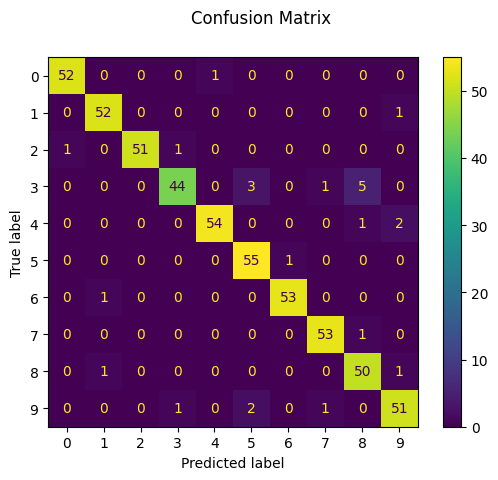

In [58]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Veamos el comportamiento general del classificador usando el método score

In [37]:
print(f"Score de entrenamiento: {clf.score(X_train, y_train):.3f}")
print(f"Score test: {clf.score(X_test, y_test):.3f}")

Score de entrenamiento: 0.997
Score test: 0.954


# 10. Explique: Si tengo que reportar el comportamiento del modelo, ¿cuál es el resultado final, 0.999 o 0.970?

Si la finalidad del modelo es predecir etiquetas de datos que no vio. Debería reportarse el score de TEST, ya que mide la precisión del modelo.

# 11. ¿Cuál de los classificadores genera mejores resultados? ¿Alguno de los modelos podría estar haciendo overfitting?

La clasificación por Vectores de Soporte (SVM), presenta un mejor performance en los datos de TEST. Tiene una precisión de 95.4% frente a los demás.

Se observa que existe una diferencia fuerte entre el SCORE de train y test en DecisionTree. Esto podría suponer un sobreajuste en el conjunto de entrenamiento y una poco generalización del modelo. Esto podría observarse mejor con un gráfica de aprendizaje. Si la diferencia entre el puntaje de entrenamiento y prueba, el modelo podría no estar aprendiendo patrones importantes, incluso capturando ruido lo que afectará su rendimiento en TEST. 

In [49]:
import numpy as np
from sklearn.model_selection import learning_curve

def drawLearningCurve(mod, X_tr, y_tr, cv=5, name='') -> None:
    train_sizes, train_scores, test_scores = learning_curve(mod, X_tr, y_tr, cv=cv)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f'Curva de Aprendizaje: {name}')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Puntaje')
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Prueba')
    plt.legend(loc='best')
    plt.show()

In [59]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted_svm = clf.predict(X_test)
print("*"*30)
print("SVM")
print(f"Score de entrenamiento: {clf.score(X_train, y_train):.3f}")
print(f"Score test: {clf.score(X_test, y_test):.3f}")

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
predicted_dt = dt.predict(X_test)

print("*"*30)
print("Arbol de decisión")
print(f"Score de entrenamiento: {dt.score(X_train, y_train):.3f}")
print(f"Score test: {dt.score(X_test, y_test):.3f}")

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
predicted_mlp = mlp.predict(X_test)
print("*"*30)
print("Multilayer Perceptro")
print(f"Score de entrenamiento: {mlp.score(X_train, y_train):.3f}")
print(f"Score test: {mlp.score(X_test, y_test):.3f}")

******************************
SVM
Score de entrenamiento: 0.997
Score test: 0.954
******************************
Arbol de decisión
Score de entrenamiento: 1.000
Score test: 0.785
******************************
Multilayer Perceptro
Score de entrenamiento: 1.000
Score test: 0.933


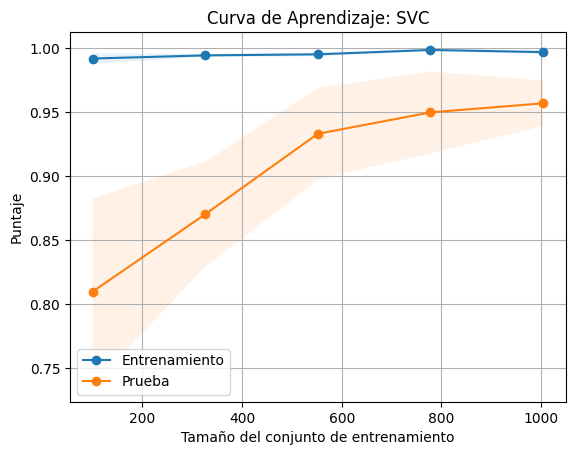

In [50]:
model = svm.SVC()
drawLearningCurve(model, X_train, y_train, name='SVC')

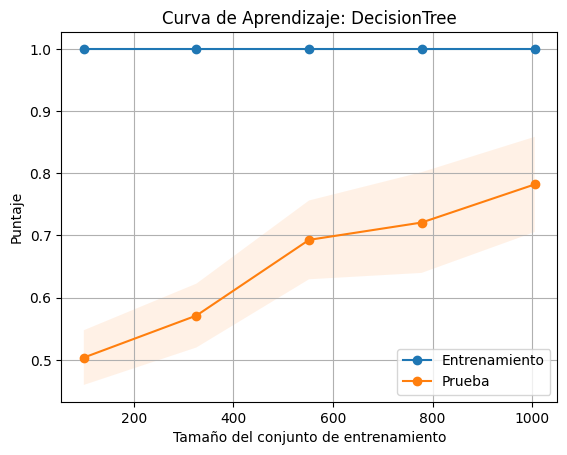

In [51]:
model = tree.DecisionTreeClassifier()
drawLearningCurve(model, X_train, y_train, name='DecisionTree')

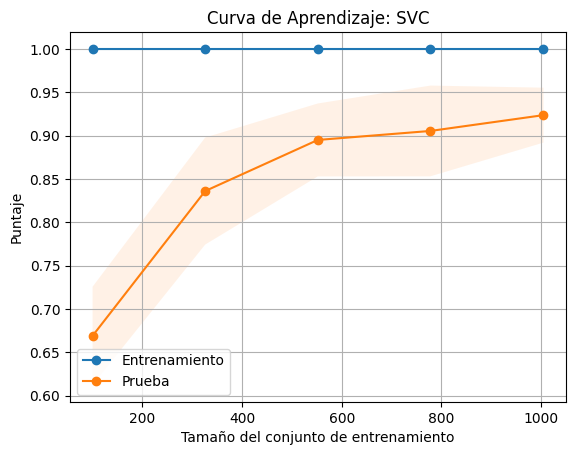

In [52]:
model = MLPClassifier()
drawLearningCurve(model, X_train, y_train, name='SVC')

# 12. Use las matrices de confusión para explicar la respuesta a la pregunta 11.

La primera figura corresponde a SVC. Como se vio antes, pueden tolerarse algunas imprecisones por números que son muy parecidos. Este tuvo la mayor precisión.

La segunda es DecisionTree. Aquí, se mostró el overfitting por la no generalización del modelo. Por ejemplo, el número 0 y 4 son confundidos 5 veces y no tienen nada que ver.

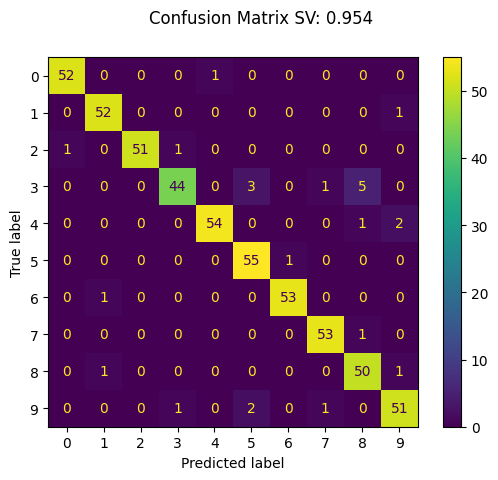

In [60]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predicted_svm)
disp.figure_.suptitle(f"Confusion Matrix SV: {clf.score(X_test, y_test):.3f}")
plt.show()

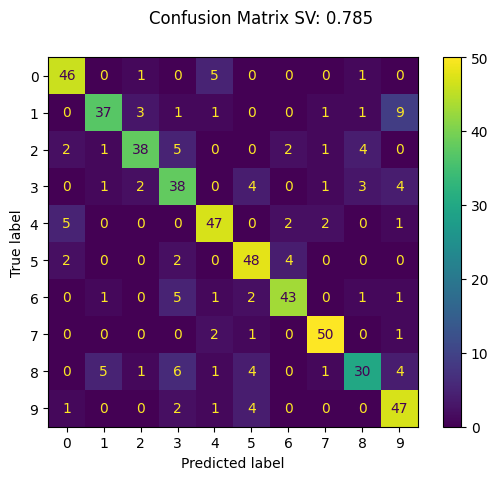

In [61]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predicted_dt)
disp.figure_.suptitle(f"Confusion Matrix SV: {dt.score(X_test, y_test):.3f}")
plt.show()